   ## EAS 503 - PROJECT - GROUP 50

# This is the Main execution file for our project. Kindly run this.

# AirBnB New User Destination Country Prediction

In [1]:
# Importing libraries.
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import numpy as np
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
import plotly.offline
plotly.offline.init_notebook_mode()
pio.renderers.default = 'iframe'
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as po
import plotly.graph_objs as pg
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style='white')
!pip install nbimporter
import nbimporter
import Database_Creation_Insertion

In [2]:
Database_Creation_Insertion.data_ingestion()  # Creating and Inserting Ingestion using other notebook script

In [3]:
# Create connection function.
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [4]:
# Creating db connection.
conn = create_connection("airbnb.db")

# **Problem we are solving**

###  **WHAT?**

1. Demand forecasting for operations.
2. Personalization.


### **WHY?**

Covid-19 forced people to stay at home and now that travel restrictions have reduced, there is a sort of rebel 
tourism taking place with large amount of people travelling to various countries. Vital for Travel Companies to recognize countries with more demand for hotels and other accomodations so that they can get more affliated properties at those destinations. This will help them immensely in maximising profits and recover the massive losses incurred in pandemic.

# OVERVIEW

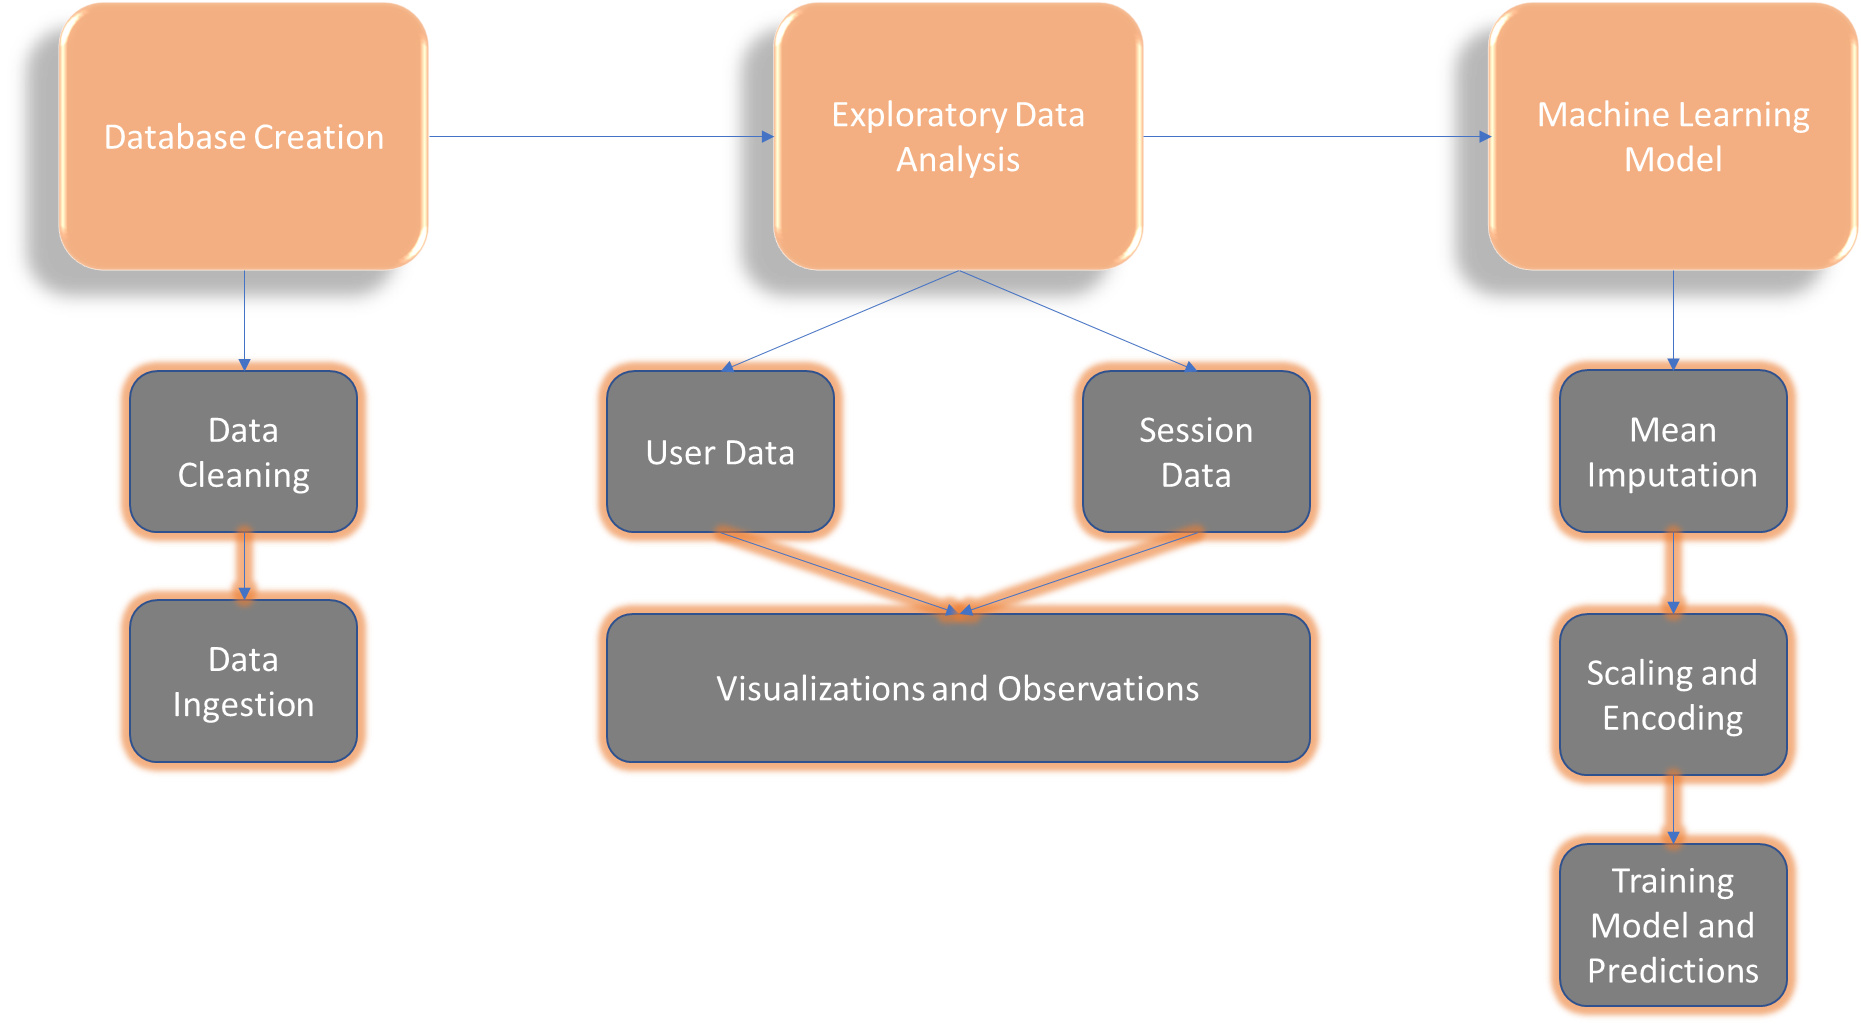

In [5]:
from IPython.display import Image
Image(filename='intro.png')

## **Database Schema**

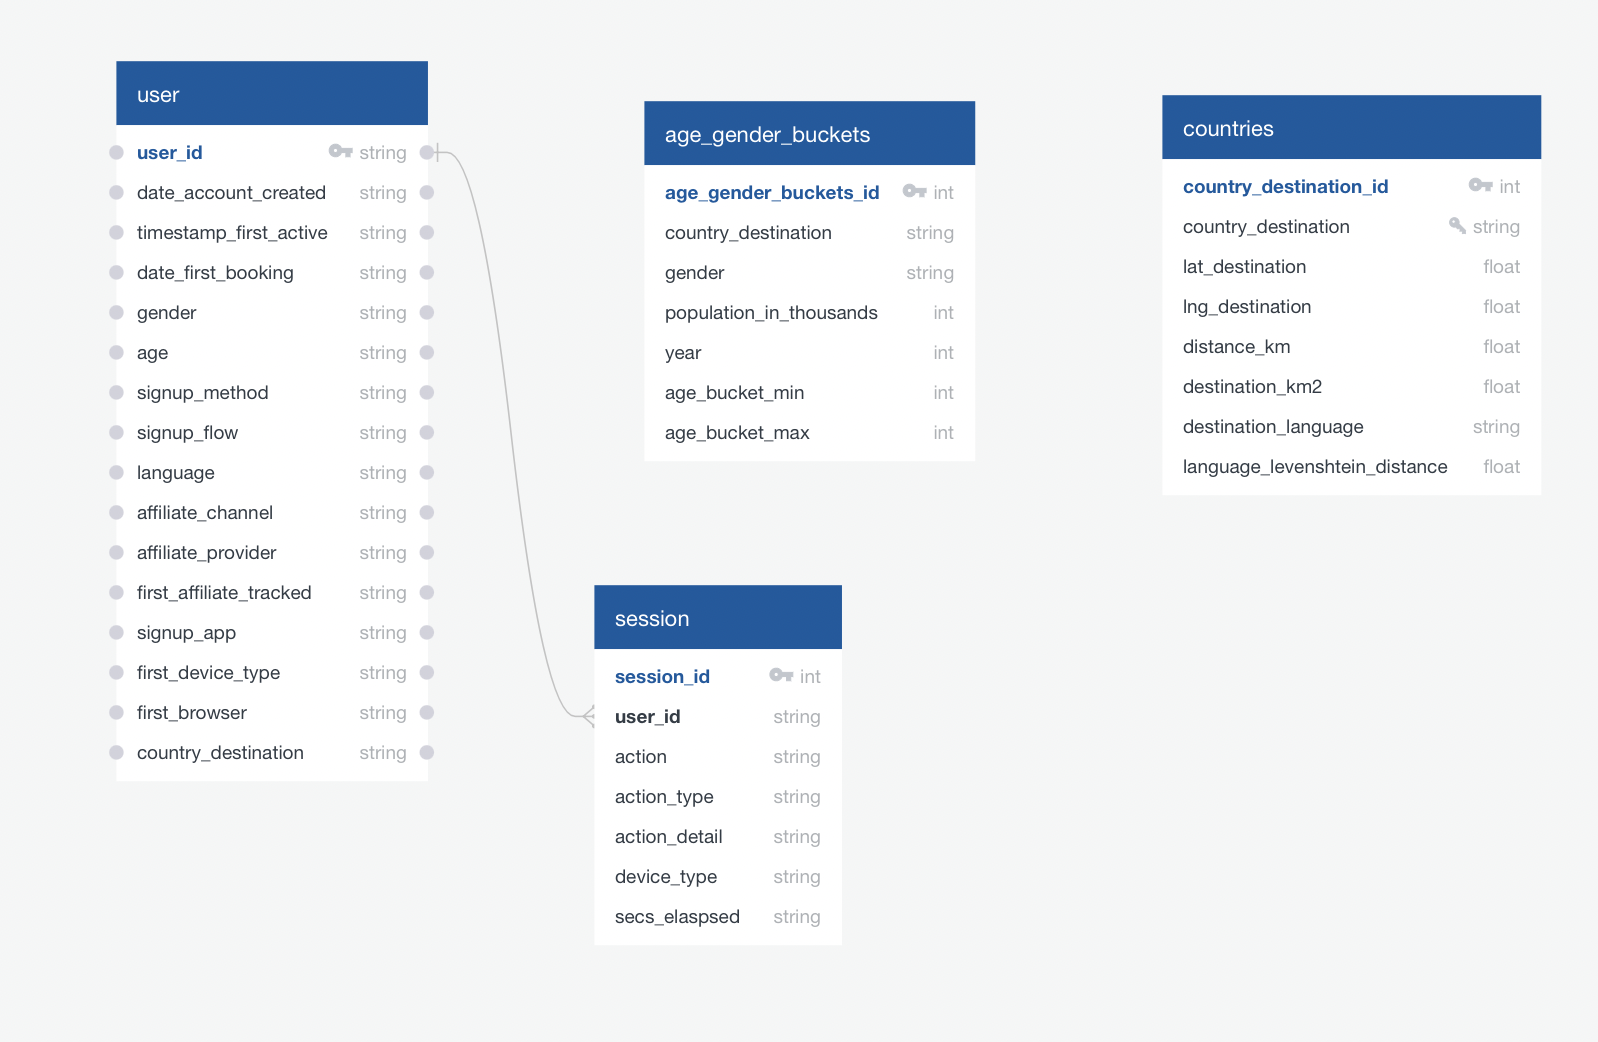

In [6]:
Image(filename ="schema.png")

- USER TABLE - 
            This contains information about the person who went on the airbnb website and made an account. 
            This table has our target variable also i.e. the country destination. It conatins information     regarding age, device type,date of booking etc.
             
- AGE GENDER BUCKETS - 
            This contains information regarding the different age brackets of various countries and genders.May be useful in analyzing if there is a difference between younger and older people's destination choices.


- SESSION - 
            This contains information about the complete session of the user when he arrived at the Airbnb website.
            It mentions the various Actions that a user can do like wishlisting properties,searching for 
            destinations or accomodations. This table also gives us the time spent by user for each action.
            
- COUNTRIES -
            This contains information regarding the various countries where people are travelling like size of 
            country,their distance from USA which is country of all users in our dataset. It will help us in 
            inferring whether people travel large distances or not.
    

In [7]:
# Destination world map
fig = px.choropleth(title='Destinations',
                    locations=['australia', 'canada', 'denmark', 'spain', 'france', 'great britain', 'italy', 'netherlands', 'portugal', 'US'],
                    locationmode="country names",
                    color=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    scope="world")
fig.show()

# **Exploratory Data Analysis**

## **Users**

In [8]:
# Understanding target variable >> country destination
# sql query for count of country destination
cur = conn.cursor()
country_destination_statement = "Select u.country_destination, count(u.user_id) as per from user as u group by u.country_destination order by count(u.user_id) desc;"
cur.execute(country_destination_statement)
rows = cur.fetchall()
country_destination, count = zip(*rows)

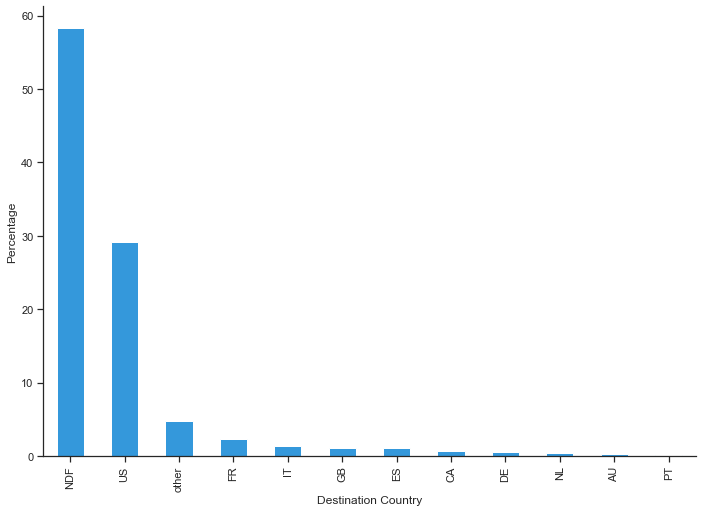

In [9]:
#count for total number of rows(will be used later on in the code also)
total_sql = "select count(user_id) as u from user;"
cur.execute(total_sql)
total = cur.fetchall()
total = int(total[0][0])

#plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = pd.Series(count) / total * 100
destination_percentage = destination_percentage.set_axis(country_destination)
destination_percentage.plot(kind='bar',color='#3498DB')
X = pd.Series(country_destination)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

- 57% of users in did not travel anywhere.
- 28 % of users travelled in their home country i.e .., U.S.

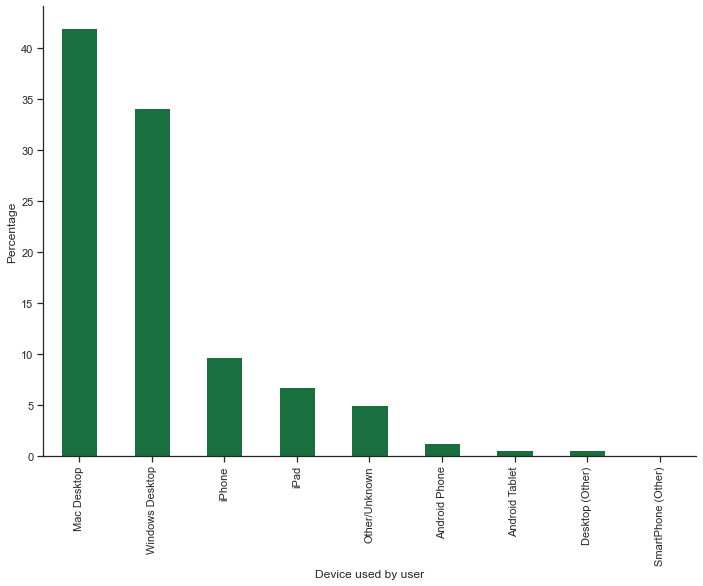

In [10]:
#plot for device type
#sql query for count of device type
device_statement = "Select u.first_device_type, count(u.user_id) as per from user as u group by u.first_device_type order by count(u.user_id) desc;"
cur.execute(device_statement)
rows = cur.fetchall()
device_type, count = zip(*rows)

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = pd.Series(count) / total * 100
device_percentage = device_percentage.set_axis(device_type)
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()



1) 58% users are using Apple products .
2) Out of 71,719 users who travelled atleast once,31660 users are apple users [ 44.15% ] which implies Mac users are booking more frequently .

In [11]:
#plot for gender
#sql query for count of gender type
gender_statement = "Select u.gender, count(u.user_id) as per from user as u group by u.gender order by count(u.user_id) desc;"
cur.execute(gender_statement)
rows = cur.fetchall()
gender, count = zip(*rows)

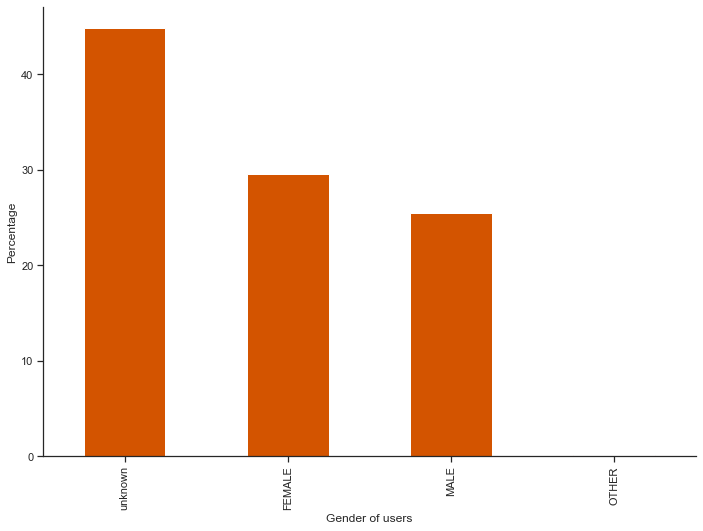

In [12]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
gender_percentage = pd.Series(count) / total * 100
gender_percentage = gender_percentage.set_axis(gender)
gender_percentage.plot(kind='bar',color='#D35400')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

- 45 % of user's gender information is unknown.
- There is less difference between Female and Male users.

In [13]:
#sql query for count of device type
age_statement = "Select u.user_id,u.age as age from user as u order by u.age ;"
cur.execute(age_statement)
rows = cur.fetchall()
idx, age = zip(*rows)

/Users/phanitejab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



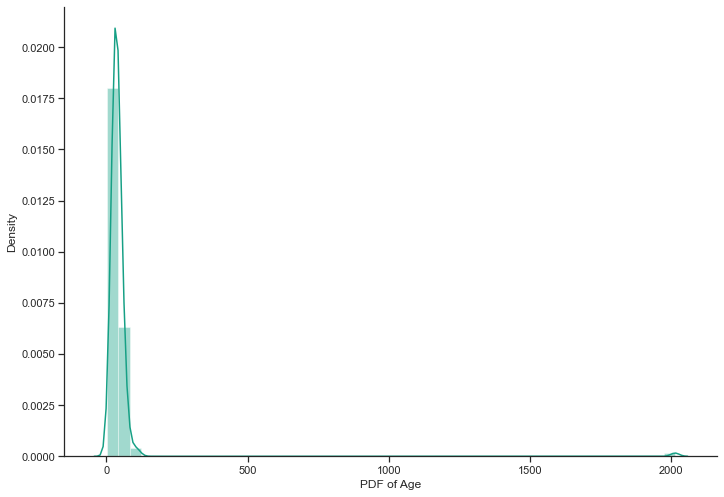

In [14]:
# plot for age and outlier detection
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(pd.Series(age).dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

- Some age values are incorrect, like close to 2000, so cleaning such data [0.0035%].

/Users/phanitejab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



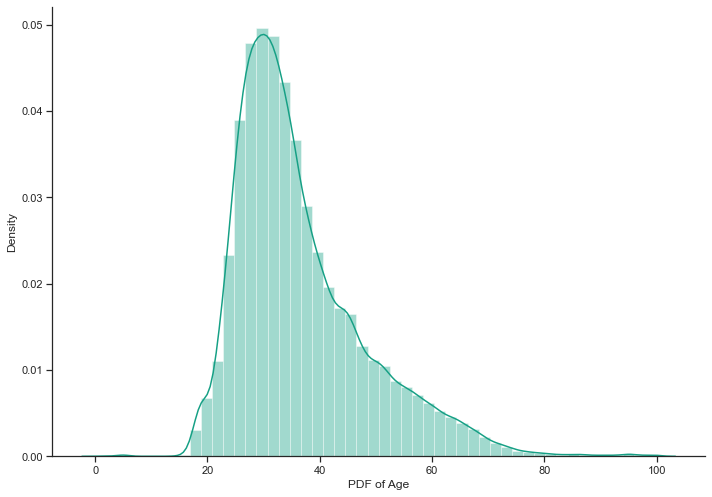

In [15]:
# age distribution after outliers are removed
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
age = pd.Series(age)
age = age[age <= 100]
sns.distplot(age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

- Majority of the users are between age 25 and 40 years. [72%]
- There are some age values which are less than 18 years [0.006%]

In [16]:
#EDA on dates and timestamp
date_query = "SELECT country_destination, strftime('%Y-%m-%d', date_account_created) AS date_account_created_new, strftime('%Y', date_account_created) AS date_account_created_year, strftime('%m', date_account_created) AS date_account_created_month, strftime('%Y-%m-%d', timestamp_first_active) AS date_first_active_new  FROM user order by timestamp_first_active"
cur.execute(date_query)
rows = cur.fetchall()
country_destination,date_account_created_new,date_account_created_year,date_account_created_month,date_first_active_new = zip(*rows)
country_destination = pd.Series(country_destination)
date_account_created_new = pd.to_datetime(pd.Series(date_account_created_new))
date_account_created_year = pd.Series(date_account_created_year)
date_account_created_month = pd.Series(date_account_created_month)
date_first_active_new = pd.Series(date_first_active_new)

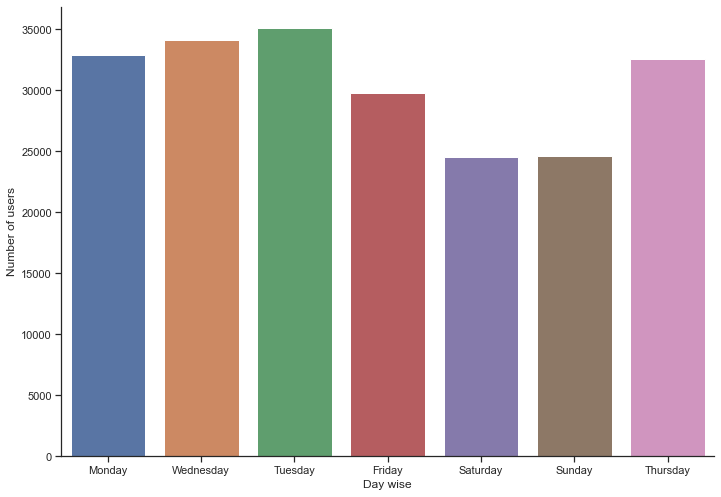

In [17]:
date_account_created_day = date_account_created_new.dt.day_name()
data_plot = pd.DataFrame({'country_destination': country_destination, 'date_account_created_new': date_account_created_new,'date_account_created_year':date_account_created_year,'date_account_created_month':date_account_created_month,'date_first_active_new':date_first_active_new,'date_account_created_day':date_account_created_day})
#plot for user activity on each day of the week
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x='date_account_created_day',data=data_plot)
plt.xlabel('Day wise')
plt.ylabel('Number of users')
sns.despine()

- User activity is low on **Saturdays and Sundays**. So, the chances of booking on Saturdays and Sundays are pretty low.

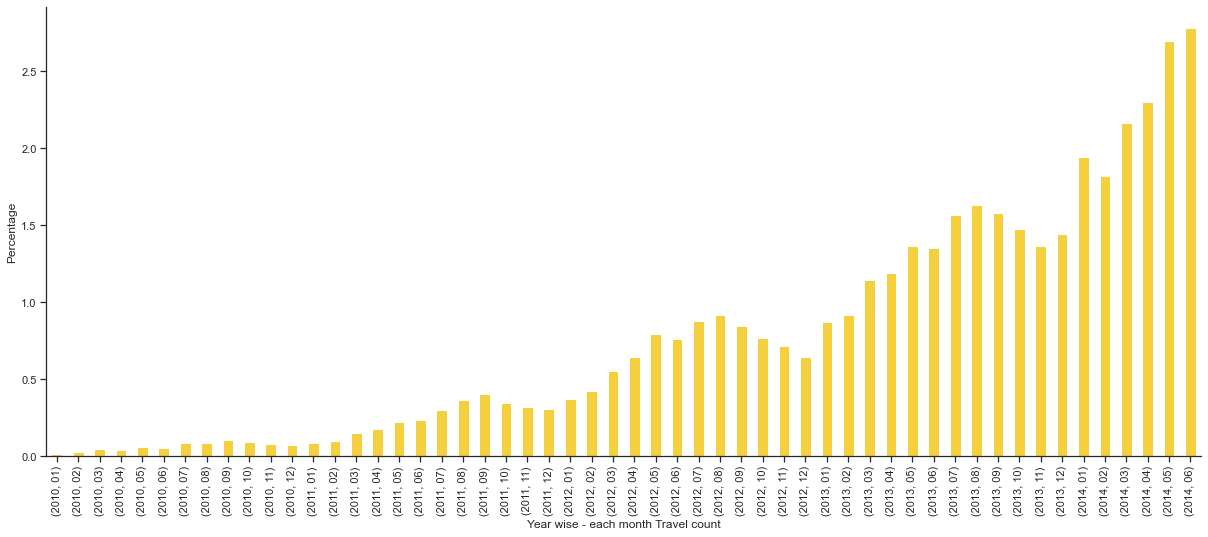

In [18]:
#Bivariate analysis
#plot for user activity based on month and year
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20.7, 8.27)
data_plot['booked'] = data_plot.country_destination.apply(lambda x:1 if x!='NDF' else 0 )
destination_percentage = data_plot.groupby(['date_account_created_year','date_account_created_month']).booked.sum() / data_plot.shape[0] * 100
destination_percentage.plot(kind='bar',color="#F4D03F")
plt.xlabel('Year wise - each month Travel count')
plt.ylabel('Percentage')
sns.despine()

- Every year  beween September and October there is increase in Activity of users on Airbnb.
- Basic study on this lead to interesting phenomena that users are trying to book for **Superbowl, Labor day.**

In [19]:
#sql query for signup app and method
signup_statement = "Select country_destination,signup_app,signup_method,age from user ;"
cur.execute(signup_statement)
rows = cur.fetchall()
country_destination,signup_app,signup_method,age = zip(*rows)
df_signup = pd.DataFrame({'country_destination':country_destination,'signup_app':signup_app,'signup_method':signup_method,'age':age})

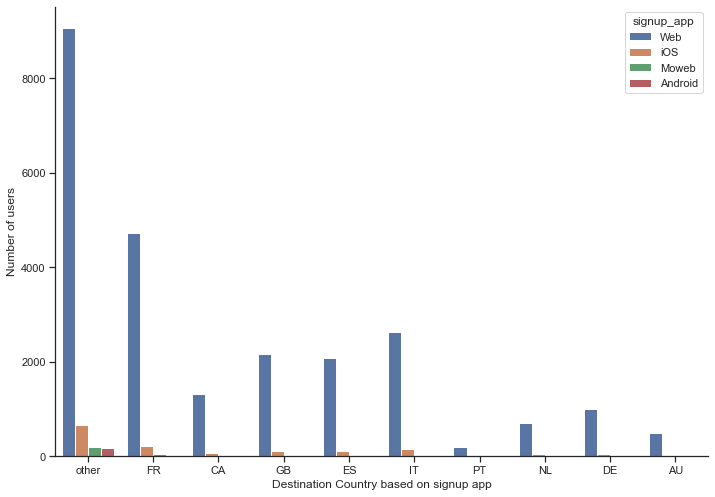

In [20]:
#plot for signup app
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df_signup[df_signup['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

- Users with signup app 'Web' outnumbered other signup app like Moweb, iOS, Android in every country. **[85%]**
- Android is the least used signup app. **[0.02%]**

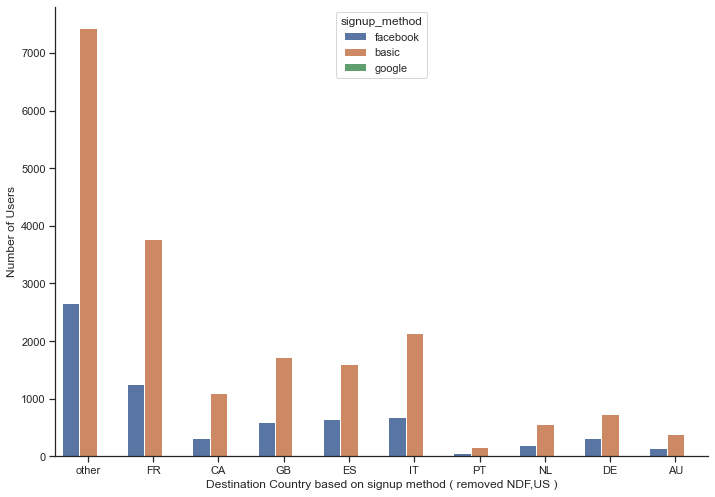

In [21]:
#plot for signup method
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df_signup[df_signup['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method ( removed NDF,US )')
plt.ylabel('Number of Users')
sns.despine()

- There are less signups (almost negligible) happening by google signup compared to facebook,basic signup **(0.03%)**
- Basic signup count is almost **2.5** times facebook signup count .

/Users/phanitejab/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



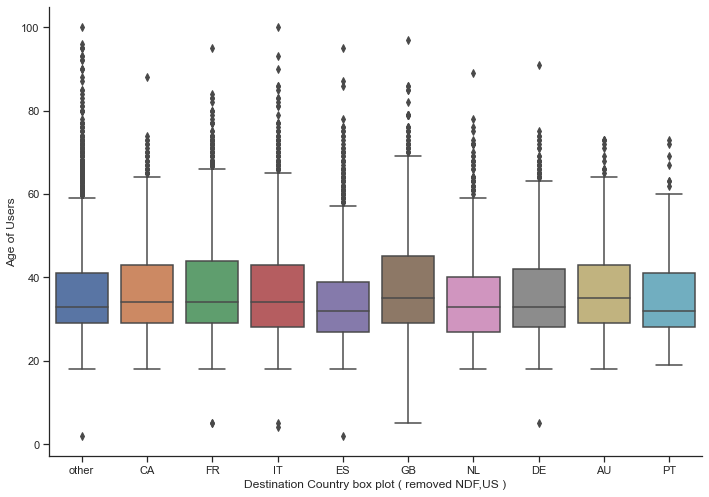

In [22]:
#plot for age distribution for each country destination
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df_signup[df_signup['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
data_without_NDF1.age.replace('NaN', np.nan, inplace=True)
data_without_NDF1 = data_without_NDF1[data_without_NDF1['age']<=100]
sns.boxplot(y='age' , x='country_destination',data=data_without_NDF1)
plt.xlabel('Destination Country box plot ( removed NDF,US )')
plt.ylabel('Age of Users')
sns.despine()

- Users booking for countries **Spain, Portugal and Netherlands** tend to be younger where as Users booking for Great Britain tend to be older.

## **Sessions**

In [23]:
# Getting user sessions information.
query = """SELECT u.user_id, s.action_detail, CASE WHEN s.total_time_spent IS NULL THEN 0 ELSE s.total_time_spent END total_time_spent, s.num_occ, u.country_destination, CASE WHEN u.country_destination = 'NDF' THEN 'Yes' ELSE 'No' END AS if_booked FROM user AS u 
            INNER JOIN (SELECT user_id, action_detail, SUM(secs_elaspsed) AS total_time_spent, COUNT(*) AS num_occ FROM session WHERE action_detail IS NOT NULL GROUP BY user_id, action_detail) AS s
            ON s.user_id = u.user_id;"""
user_action_details = cur.execute(query).fetchall()
user_action_details_df = pd.DataFrame(data=user_action_details, columns=['user_id', 'action_detail', 'total_time_spent', 'num_occ', 'country_destination', 'if_booked'])

In [24]:
print("Number of unique action details: ", user_action_details_df['action_detail'].nunique())

Number of unique action details:  128


There are a lot of actions.

Let's remove the non important activities first?

1. The activities which are least done.
2. The activities on which time spent is very less.

In [25]:
action_detail_agg = user_action_details_df.groupby(['action_detail'], as_index=False).agg(avg_time_spent_per_user=('total_time_spent', np.mean), avg_occ_per_user=('num_occ', np.mean), num_users_used=('num_occ', 'count'))
action_detail_agg['avg_time_spent_per_user'] = round(action_detail_agg['avg_time_spent_per_user']/60, 0).astype(int)
action_detail_agg['avg_occ_per_user'] = round(action_detail_agg['avg_occ_per_user'], 2)
action_detail_agg = action_detail_agg.sort_values(['avg_time_spent_per_user'], ascending=False)

In [26]:
action_detail_agg

action_detail  avg_time_spent_per_user  avg_occ_per_user  \
108  update_listing_description                    11698              6.81   
121         view_search_results                     7743             20.80   
70                           p3                     5278             12.58   
63               message_thread                     5150              6.37   
91                 set_password                     4651              1.06   
..                          ...                      ...               ...   
24                confirm_email                       15              1.02   
10   apply_coupon_click_success                       13              1.13   
49                 host_respond                       12              1.00   
32                  create_user                        4              1.02   
93                       signup                        2              1.02   

     num_users_used  
108            2531  
121           43892  
70            48500  
63            12215  
91              406  
..              ...  
24              129  
10               15  
49                2  
32            32480  
93             8575  

[128 rows x 4 columns]

<AxesSubplot:xlabel='avg_time_spent_per_user'>

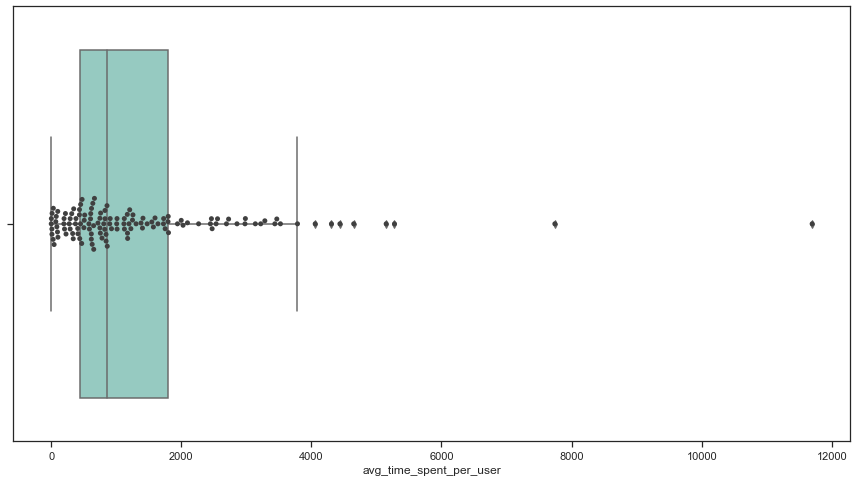

In [27]:
# Boxplot of actions - average time spent per user.
sns.boxplot(data=action_detail_agg, x='avg_time_spent_per_user', palette="Set3")
sns.swarmplot(data=action_detail_agg, x='avg_time_spent_per_user', color=".25")

<AxesSubplot:xlabel='avg_occ_per_user'>

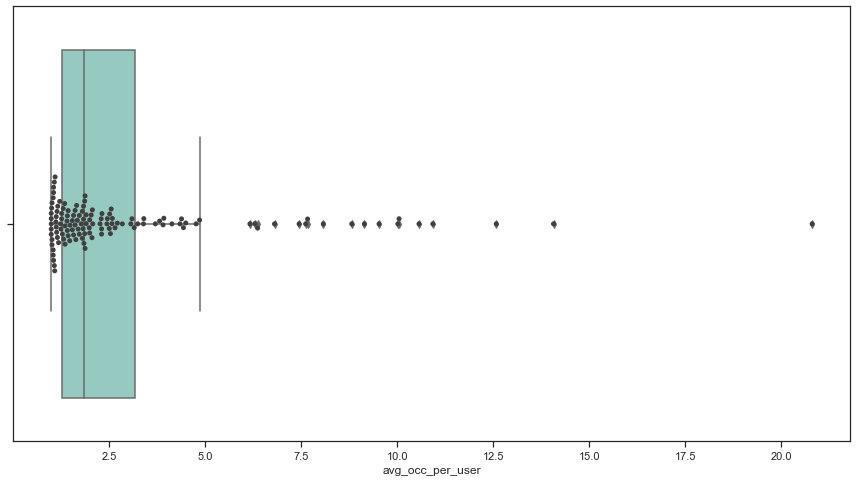

In [28]:
# Boxplot - Number of sessions of a user on a particular action.
sns.boxplot(data=action_detail_agg, x='avg_occ_per_user', palette="Set3")
sns.swarmplot(data=action_detail_agg, x='avg_occ_per_user', color=".25")

<AxesSubplot:xlabel='num_users_used'>

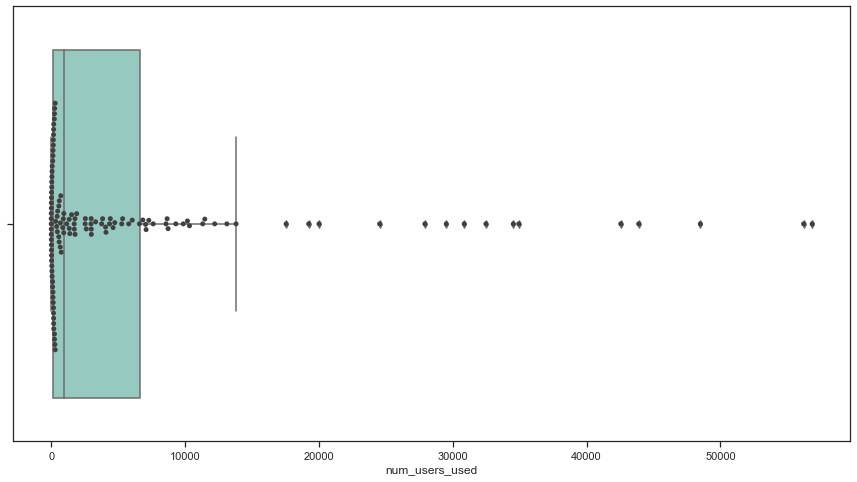

In [29]:
# Boxplot - Number of users on a particular action.
sns.boxplot(data=action_detail_agg, x='num_users_used', palette="Set3")
sns.swarmplot(data=action_detail_agg, x='num_users_used', color=".25")

**Setting thresholds**

In [30]:
iqr_1 = action_detail_agg.avg_time_spent_per_user.quantile(0.75) - action_detail_agg.avg_time_spent_per_user.quantile(0.25)
iqr_2 = action_detail_agg.avg_occ_per_user.quantile(0.75) - action_detail_agg.avg_occ_per_user.quantile(0.25)
iqr_3 = action_detail_agg.num_users_used.quantile(0.75) - action_detail_agg.num_users_used.quantile(0.25)

avg_time_spent_threshold_low = action_detail_agg.avg_time_spent_per_user.quantile(0.25)
avg_time_spent_threshold_high = action_detail_agg.avg_time_spent_per_user.quantile(0.75) + 1.5*iqr_1
avg_occ_per_user_threshold_low = action_detail_agg.avg_occ_per_user.quantile(0.25)
avg_occ_per_user_threshold_high = action_detail_agg.avg_occ_per_user.quantile(0.75) + 1.5*iqr_2
num_users_used_threshold_low = action_detail_agg.num_users_used.quantile(0.25)
num_users_used_threshold_high = action_detail_agg.num_users_used.quantile(0.75) + 1.5*iqr_3

In [31]:
filtered_action_details = action_detail_agg.loc[(action_detail_agg['avg_time_spent_per_user'] > avg_time_spent_threshold_low) & (action_detail_agg['avg_occ_per_user'] > avg_occ_per_user_threshold_low) & (action_detail_agg['num_users_used'] > num_users_used_threshold_low) & (action_detail_agg['avg_time_spent_per_user'] < avg_time_spent_threshold_high) & (action_detail_agg['avg_occ_per_user'] < avg_occ_per_user_threshold_high) & (action_detail_agg['num_users_used'] < num_users_used_threshold_high)]

In [32]:
print("Number of unique actions after removing non-important actions ", filtered_action_details['action_detail'].nunique())

Number of unique actions after removing non-important actions  45


In [33]:
user_action_details_df = user_action_details_df[user_action_details_df['action_detail'].isin(filtered_action_details['action_detail'])]

### Comparing time spent on the actions

In [34]:
# Calculating average time spent per session on an action.
user_action_details_df['avg_time_spent'] = round(user_action_details_df['total_time_spent']/user_action_details_df['num_occ'])

# Filtering.
user_action_details_df = user_action_details_df[['user_id', 'action_detail', 'avg_time_spent', 'num_occ', 'country_destination', 'if_booked']]

# Pivoting.
user_session_features = pd.pivot_table(data=user_action_details_df, index=['user_id', 'country_destination', 'if_booked'], values=['avg_time_spent', 'num_occ'], columns='action_detail').reset_index()
user_session_features.columns = [x[0] + '_' + x[1] for x in user_session_features.columns]
user_session_features = user_session_features.rename(columns={'user_id_': 'user_id', 'country_destination_': 'country_destination', 'if_booked_': 'if_booked'})

# Filling null values by 0.
user_session_features = user_session_features.fillna(0)

(0.0, 100000.0)

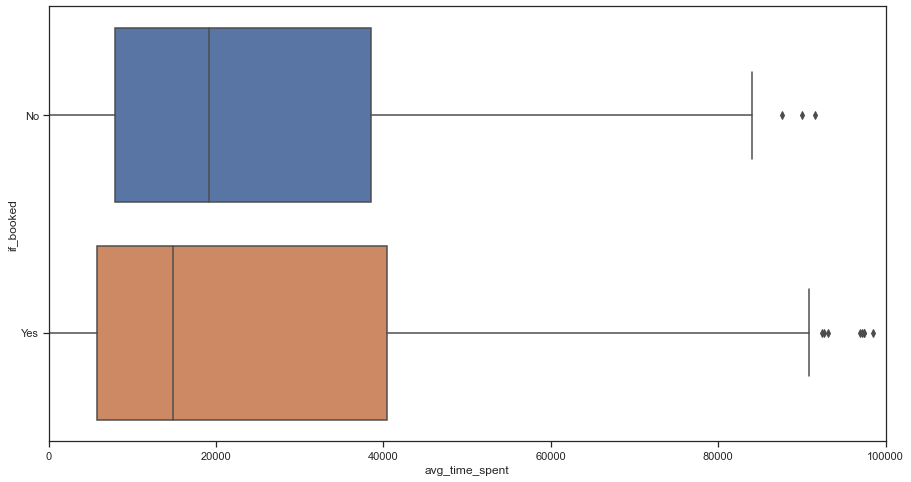

In [35]:
sns.boxplot(data=user_action_details_df[user_action_details_df['action_detail'] == 'book_it'], y='if_booked', x='avg_time_spent')
plt.xlim(0, 0.1*10**6)

- Users who book a trip spend less time on the 'book_it' section.

(0.0, 200000.0)

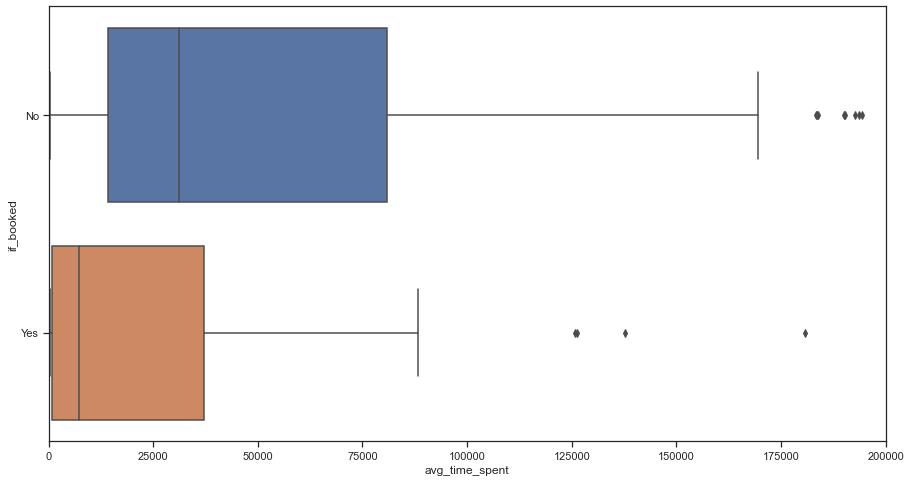

In [36]:
sns.boxplot(data=user_action_details_df[user_action_details_df['action_detail'] == 'guest_itinerary'], y='if_booked', x='avg_time_spent')
plt.xlim(0, 0.2*10**6)

- Users who book a trip spend less time on the 'guest_itinerary' than the ones who do not.

(0.0, 40000.0)

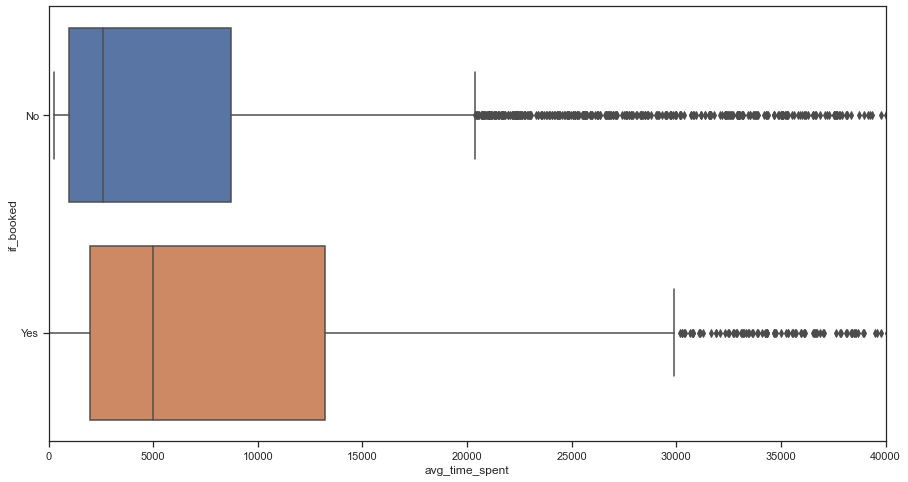

In [37]:
sns.boxplot(data=user_action_details_df[user_action_details_df['action_detail'] == 'your_trips'], y='if_booked', x='avg_time_spent')
plt.xlim(0, 0.4*10**5)

- Users who book a trip spend more time on 'your_trips' section on an average.

# **Machine Learning Model**

In [38]:
user_session = pd.read_csv("user_session_features.csv")
user_ids = user_session.user_id
user_session = user_session.drop(columns=['user_id','date_account_created','timestamp_first_active','date_first_booking','if_booked'])

In [39]:
train_val_df, test_df = train_test_split(user_session, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [40]:
input_cols= list(user_session.columns)
input_cols.remove('country_destination')
target_col = 'country_destination'

In [41]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [42]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

imputer.fit(user_session[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

## **Scaling Numeric Features**

In [44]:
scaler = MinMaxScaler()
scaler.fit(user_session[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

## One hot encoding for Categorical Features

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(user_session[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

## **Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val= val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

0.615101116576872

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [50]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    f1= f1_score (targets,preds,average='weighted')
    print (f1)

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 61.51%
0.5523879946078245


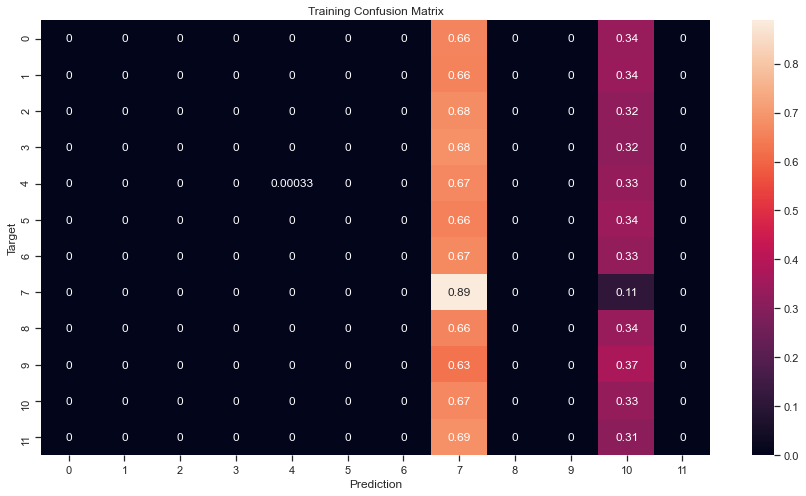

In [51]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 61.55%
0.5533441209781589


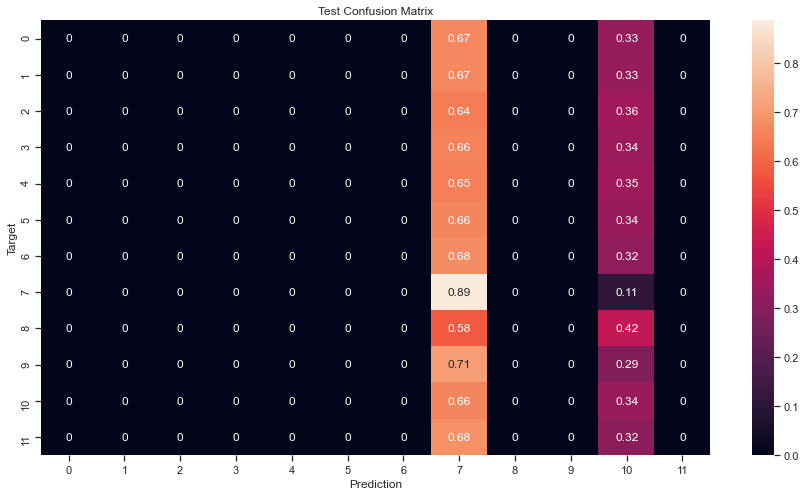

In [52]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

## **Decision Tree**

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
sample_split_range = list(range(5, 50,2))
param_grid = dict(min_samples_split=sample_split_range)

model = DecisionTreeClassifier(min_samples_split=5)
model.fit(X_train, train_targets)
train_preds = model.predict(X_train)
accuracy_score(train_targets, train_preds)

0.7672600921371125

Accuracy: 76.73%
0.7503660884677228


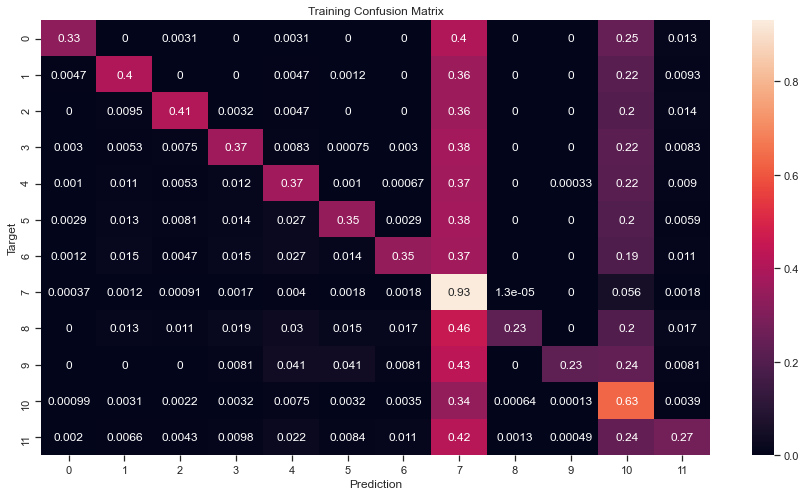

In [55]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

In [56]:
importance = model.feature_importances_[:6]
s = pd.Series(importance)
s.sort_values(ascending = False)

0    0.282750
1    0.036031
4    0.011805
2    0.001511
3    0.001334
5    0.000106
dtype: float64

Accuracy: 58.44%
0.5575101712785939


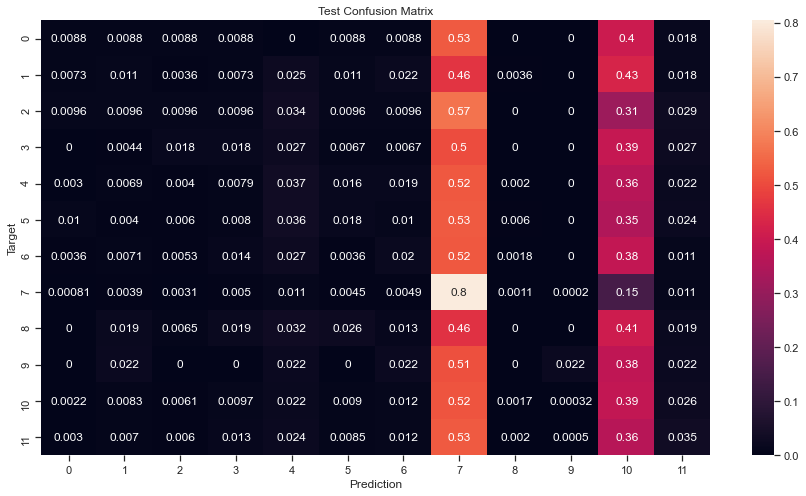

In [57]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

## **Gradient Boosting**

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
model = GradientBoostingClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,random_state=None)
model.fit(X_train, train_targets)
train_preds = model.predict(X_train)
accuracy_score(train_targets, train_preds)

0.671101741235262

Accuracy: 67.11%
0.6356438839827967


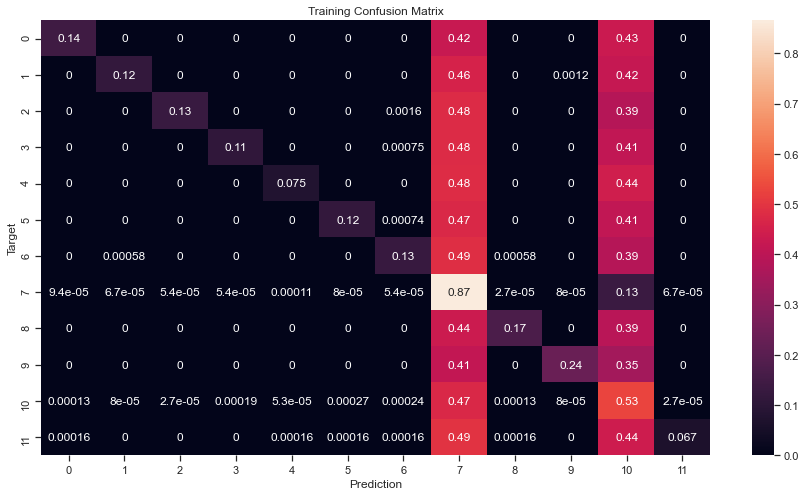

In [60]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 64.01%
0.5960592437201887


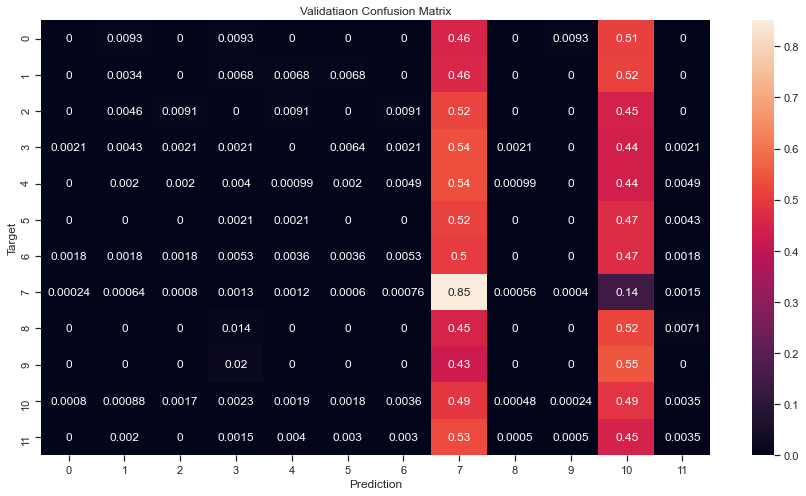

In [61]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

<AxesSubplot:>

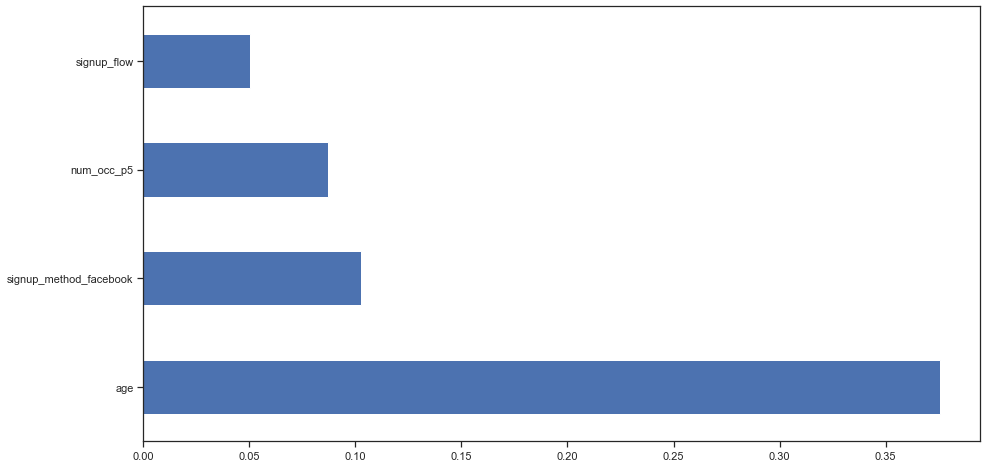

In [62]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

# Conclusions and Future Work

AGE is playing a very important factor in making the final decision
Younger People tend to go to Countries like Netherlands and Spain
While Older People tend to go to Great Britain!

People using Facebook as login method are booking.One possible hypothesis from this is that people sharing their
facebook information want personalized experience and are serious about booking

The company has assigned various numeric values to different sign up flow. For ex: One signup flow could include 
verifying email address. People coming through some particular signup flows have correlation to which country 
we are going.


1) Now whenever a new user signs up on the AirBnb website, they can predict where the user wants to go through his 
information and sessions details.This will help them in ramping up operations for the predicted country

2) Also they can personalize experience for that user using ads, banner and discount coupons and nudge him to
actually make a booking.